<a href="https://colab.research.google.com/github/Pabloacostatec/iayaa-Equipo-25/blob/main/Actividad_7_Pr%C3%A1ctica_%7C_%C3%81rbol_de_decisi%C3%B3n_y_bosque_aleatorio_A01794035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es. La variable de salida se llama “kredit”.  

Importar todas las librerías

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests, zipfile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns


1.  Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.  

In [ ]:
#This method Imports zip directly
# importing necessary modules

print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')

In [ ]:
#Change names

df = df.rename(columns={"laufkont":"status"})
df = df.rename(columns={"laufzeit":"duration"})
df = df.rename(columns={"moral":"credit_history"})
df = df.rename(columns={"verw":"purpose"})
df = df.rename(columns={"hoehe":"amount"})
df = df.rename(columns={"sparkont":"savings"})
df = df.rename(columns={"beszeit":"employment_duration"})
df = df.rename(columns={"rate":"installment_rate"})
df = df.rename(columns={"famges":"personal_status_sex"})
df = df.rename(columns={"buerge":"other_debtors"})
df = df.rename(columns={"wohnzeit":"present_residence"})
df = df.rename(columns={"verm":"property"})
df = df.rename(columns={"alter":"age"})
df = df.rename(columns={"weitkred":"other_installment_plans"})
df = df.rename(columns={"wohn":"housing"})
df = df.rename(columns={"bishkred":"number_credits"})
df = df.rename(columns={"beruf":"job"})
df = df.rename(columns={"pers":"people_liable"})
df = df.rename(columns={"telef":"telephone"})
df = df.rename(columns={"gastarb":"foreign_worker"})
df = df.rename(columns={"kredit":"credit_risk"})   #This is our output variable to predict "Y"

#Print each of the categories count
print('The independent variable count is:') 
print(df['credit_risk'].value_counts())

#Print example df
df

The independent variable count is:
1    700
0    300
Name: credit_risk, dtype: int64


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
#Check if the types are the same as they are documented
print(df.dtypes)
print(df['credit_risk'].value_counts())


status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object
1    700
0    300
Name: credit_risk, dtype: int64


2.  Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida.

In [ ]:
#Utilize train_test_split to get the training, validation and test splits, we use stratify = independent variable to make sure there is
#equal representation from the binary independent variable

X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

X = pd.DataFrame(X)
y = pd.DataFrame(y)

Xtv, Xtest, ytv, ytest = train_test_split(X,y, train_size=.85, random_state=1, stratify = y)
Xtv, Xtest, ytv, ytest 

print(ytv['credit_risk'].value_counts(1))
print(ytest['credit_risk'].value_counts(1))

1    0.7
0    0.3
Name: credit_risk, dtype: float64
1    0.7
0    0.3
Name: credit_risk, dtype: float64


3.  Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas  para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

  a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 

  b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

  c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar. 

In [ ]:
#def ImputateData(df):
#All types int64 and float64 are 'quantitative' type
# Binary and categorical types have their description underneath

#Variable ordinal, se queda como int64
#df = df.astype({"status":"category"})

""" 1 : no checking account                       
2 : ... < 0 DM                                
3 : 0<= ... < 200 DM                          
4 : ... >= 200 DM / salary for at least 1 year"""

df = df.astype({"duration":"int64"})

df = df.astype({"credit_history":"category"})
"""0 : delay in paying off in the past            
1 : critical account/other credits elsewhere   
2 : no credits taken/all credits paid back duly
3 : existing credits paid back duly till now   
4 : all credits at this bank paid back duly  """

df = df.astype({"purpose":"category"})
""" 0 : others             
1 : car (new)          
2 : car (used)         
3 : furniture/equipment
4 : radio/television   
5 : domestic appliances
6 : repairs            
7 : education          
8 : vacation           
9 : retraining         
10 : business """

df = df.astype({"amount":"int64"})

#Variable ordinal, se queda como int64
#df = df.astype({"savings":"category"})
""" 1 : unknown/no savings account
2 : ... <  100 DM             
3 : 100 <= ... <  500 DM      
4 : 500 <= ... < 1000 DM      
5 : ... >= 1000 DM   """

#Variable ordinal, se queda como int64
#df = df.astype({"employment_duration":"category"})
""" 1 : unemployed      
2 : < 1 yr          
3 : 1 <= ... < 4 yrs
4 : 4 <= ... < 7 yrs
5 : >= 7 yrs     """

#Variable ordinal, se queda como int64
#df = df.astype({"installment_rate":"int64"})
""" 
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20   
"""

df = df.astype({"personal_status_sex":"category"})
""" 1 : male : divorced/separated           
2 : female : non-single or male : single
3 : male : married/widowed              
4 : female : single     """

df = df.astype({"other_debtors":"category"})
""" 1 : none        
2 : co-applicant
3 : guarantor   """

#Variable ordinal, se queda como int64
#df = df.astype({"present_residence":"category"})
"""" 1 : < 1 yr          
2 : 1 <= ... < 4 yrs
3 : 4 <= ... < 7 yrs
4 : >= 7 yrs    """

df = df.astype({"property":"category"})
""" 1 : unknown / no property                    
2 : car or other                             
3 : building soc. savings agr./life insurance
4 : real estate     """

df = df.astype({"age":"int64"})

df = df.astype({"other_installment_plans":"category"})
""" 1 : bank  
2 : stores
3 : none  """

df = df.astype({"housing":"category"})
""" 1 : for free
2 : rent    
3 : own   """

#Variable ordinal, se queda como int64
#df = df.astype({"number_credits":"category"})
""" 1 : 1   
2 : 2-3 
3 : 4-5 
4 : >= 6"""

#NO ES ORDINAL
df = df.astype({"job":"category"})
""" 1 : unemployed/unskilled - non-resident       
2 : unskilled - resident                      
3 : skilled employee/official                 
4 : manager/self-empl./highly qualif. employee"""


df = df.astype({"people_liable":"category"})
""" 1 : 3 or more
2 : 0 to 2   """

########### BINARY DATA SHOULD ACTUALLY NOT BE ONE-HOT  ENCODED!!!!!!           ############
########### Too many X inputs are prone to overfit the model                   ###########
########### In a nutshell, converting a binary variable into a one-hot encoded  ###########
########### one is redundant and may lead to troubles that are needless         ###########
########### and unsolicited. Although correlated features may not always        ###########
########### worsen your model, yet they will not always improve it either.      ###########

#df = df.astype({"telephone":"bool"})
""" 1 : no                       
2 : yes (under customer name)"""

#df = df.astype({"foreign_worker":"bool"})
""" 1 : yes
2 : no """

#df = df.astype({"credit_risk":"bool"}) #This is our output variable to predict "Y"
""" 0 : bad 
1 : good"""

#print(df.dtypes)

#ImputateData(df)
df.dtypes

status                        int64
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                       int64
employment_duration           int64
installment_rate              int64
personal_status_sex        category
other_debtors              category
present_residence             int64
property                   category
age                           int64
other_installment_plans    category
housing                    category
number_credits                int64
job                        category
people_liable              category
telephone                     int64
foreign_worker                int64
credit_risk                   int64
dtype: object

In [ ]:
#Categorize all columns
#credit_risk is the independent variable

CategoricalList = ['credit_history','purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','people_liable']
OrdinalList = ['status','savings','employment_duration','installment_rate','present_residence','number_credits','job']
NumericList = ['duration','amount','age']
BinaryList = ['telephone','foreign_worker']

#Define each pipeline for each type of category

NumericColumnsPipeline = Pipeline(steps= [('MinMax', MinMaxScaler(feature_range=(1, 2)))])
CategoricalColumnsPipeline = Pipeline(steps= [('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore'))])
BinaryColumnsPipeline = Pipeline(steps= [('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))])

#Define the column transformer that applies pipelines
TransformColumns = ColumnTransformer(transformers = [('numerical',NumericColumnsPipeline,NumericList),('CategoricalList',CategoricalColumnsPipeline,CategoricalList),('BinaryList',BinaryColumnsPipeline,BinaryList)],remainder='passthrough')
#TransformColumns = ColumnTransformer(transformers = [('numerical',NumericColumnsPipeline,NumericList),('CategoricalNominal',CategoricalColumnsPipeline,CategoricalList),('CategoricalOrdinal',CategoricalColumnsPipeline,OrdinalList)],remainder='passthrough')
#Call column transformer
XtrainFit = TransformColumns.fit(Xtv)
XtrainTransf = pd.DataFrame(XtrainFit.transform(Xtv))

XtrainTransf 

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.205882,1.138707,1.410714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,5.0,5.0,4.0,2.0,2.0,3.0
1,1.294118,1.705830,1.178571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,4.0
2,1.382353,1.217012,1.535714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,3.0,5.0,5.0,4.0,4.0,2.0,2.0
3,1.029412,1.061102,1.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,4.0,4.0,1.0,4.0
4,1.117647,1.058171,1.446429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,4.0,3.0,3.0,4.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.117647,1.032877,1.839286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,3.0,3.0,4.0,3.0,1.0,2.0
846,1.382353,1.253011,1.160714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0
847,1.205882,1.149729,1.821429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,3.0
848,1.382353,1.229818,1.375000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,4.0


4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

      

    a.  Usa los parámetros predeterminados de cada modelo.

    b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas). 

    c.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

    d.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 
  


In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,xlabel,ylabel,title):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".

    try:
      train_mean = np.mean(train_scores, axis=1)
      train_std = np.std(train_scores, axis=1)
      val_mean = np.mean(val_scores, axis=1)
      val_std = np.std(val_scores, axis=1)
    except:
      train_mean = np.mean(train_scores)
      train_std = np.std(train_scores)
      val_mean = np.mean(val_scores)
      val_std = np.std(val_scores)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

def get_models():

  models = list()
  names = list()

  # LR - Regresión Logística:
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LogisticRegression')

  # DT - Decision Tree:
  models.append(DecisionTreeClassifier())
  names.append('DecisionTree')

  # RF - Random Forest:
  models.append(RandomForestClassifier())
  names.append('RandomForest')

  return models, names

def my_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def my_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def my_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def my_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1score = 2*tp / 2*tp + fp + fn 
  return f1score

def my_gmean(yreal, ypred):
  cm = confusion_matrix(ypred, yreal)
  vn,fp,fn,vp = cm[0,0],cm[1,0],cm[0,1],cm[1,1]
  gmean = np.sqrt((vp / (vp+fn))*(vn / (vn+fp)))
  return gmean

In [ ]:
models, names = get_models()
resultados = list()

mismetricas = {
    "accuracy": make_scorer(my_accuracy),
    "precision": make_scorer(my_precision),
    "recall": make_scorer(my_recall),
    "f1score": make_scorer(my_f1score),
    "gmean": make_scorer(my_gmean)
}

for i in range(len(models)):
  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',TransformColumns),('m',models[i].fit(Xtv,ytv.values.ravel()))])

  resultadosOU = cross_validate(pipeline, Xtv, ytv.values.ravel(), scoring=mismetricas, cv=kfold,return_train_score=True)

  resultados.append(resultadosOU)
  
  print('Training score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']),
                                                                          np.std(resultadosOU['train_f1score']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean'])
                                                                          ))
  
  print('Test score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean'])
                                                                          ))
  

Training score

LogisticRegression:
mean Accuracy: 0.794 (0.0097)
mean precision: 0.819 (0.0104)
mean recall: 0.905 (0.0098)
mean f1score: 0.860 (0.0061)
mean Gmean: 0.694 (0.0213)

Test score

LogisticRegression:
mean Accuracy: 0.766 (0.0300)
mean precision: 0.803 (0.0234)
mean recall: 0.883 (0.0340)
mean f1score: 0.841 (0.0214)
mean Gmean: 0.659 (0.0466)

Training score

DecisionTree:
mean Accuracy: 1.000 (0.0000)
mean precision: 1.000 (0.0000)
mean recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)

Test score

DecisionTree:
mean Accuracy: 0.705 (0.0313)
mean precision: 0.791 (0.0263)
mean recall: 0.789 (0.0362)
mean f1score: 0.789 (0.0234)
mean Gmean: 0.632 (0.0479)

Training score

RandomForest:
mean Accuracy: 1.000 (0.0000)
mean precision: 1.000 (0.0000)
mean recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)

Test score

RandomForest:
mean Accuracy: 0.762 (0.0266)
mean precision: 0.781 (0.0186)
mean recall: 0.918 (0.0285)
m

Training Boxplots


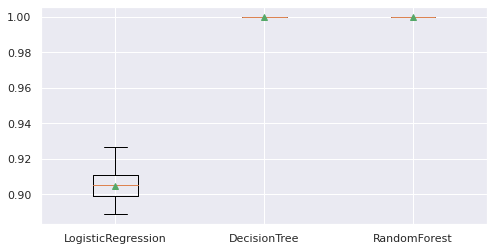

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=names, showmeans=True)

print('Training Boxplots')
plt.show()

Test Boxplots


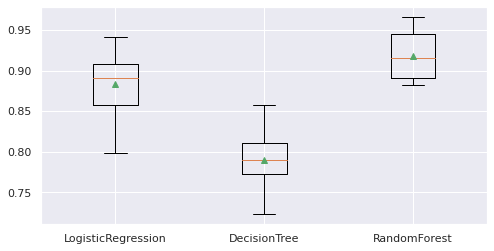

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=names, showmeans=True)

print('Test Boxplots')
plt.show()


  e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 

    i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.

    ii.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.  

    iii.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

Curvas de aprendizaje de Logistic Regression


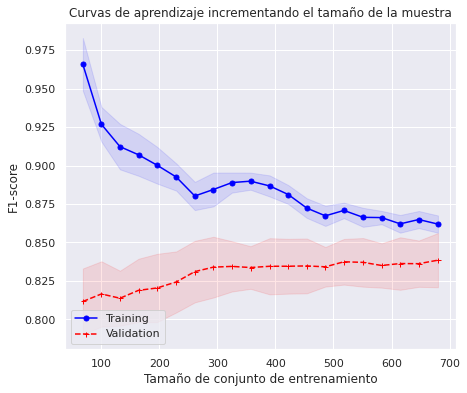

In [ ]:
delta_train_sz = np.linspace(0.1,1, num=20)
pipelineLR = Pipeline(steps=[('ct',TransformColumns),('m',LogisticRegression(max_iter=10000, random_state=1))])
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineLR,    
                                              X = Xtv,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'f1',
                                              random_state=2)

print('Curvas de aprendizaje de Logistic Regression')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'F1-score', 'Curvas de aprendizaje incrementando el tamaño de la muestra')

Curvas de aprendizaje de Decision tree


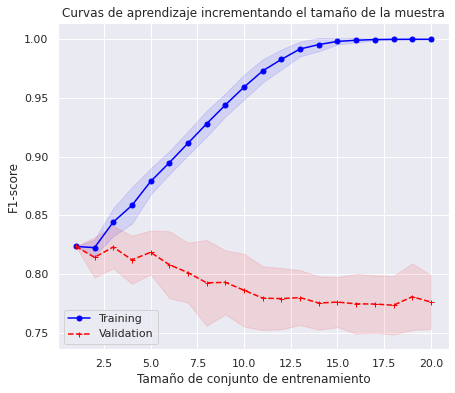

In [ ]:
delta_train_sz = np.linspace(1,20, num=20)
pipelineDT = Pipeline(steps=[('ct',TransformColumns),('m',DecisionTreeClassifier())])
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

tr_scores, val_scores = validation_curve(estimator = pipelineDT,    
                                              X = Xtv,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              param_name = 'm__max_depth',
                                              param_range = delta_train_sz ,
                                              scoring = 'f1')

print('Curvas de aprendizaje de Decision tree')
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'F1-score', 'Curvas de aprendizaje incrementando el tamaño de la muestra')

Curvas de aprendizaje de Random Forest


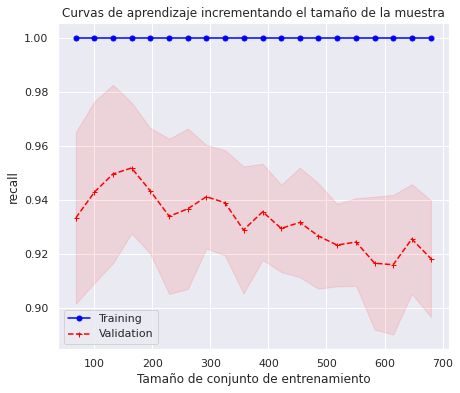

In [ ]:
delta_train_sz = np.linspace(0.1,1, num=20)

pipelineRF = Pipeline(steps=[('ct',TransformColumns),('m',RandomForestClassifier())])
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineRF,    
                                              X = Xtv,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'recall',
                                              random_state=2)

print('Curvas de aprendizaje de Random Forest')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'recall','Curvas de aprendizaje incrementando el tamaño de la muestra')

5.  Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.

Puedes consultar su documentación de GridSearchCV en la siguiente liga:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  




a.  Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

b.  Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

PenaltyList = list()
PenaltyList = ['l1', 'l2', 'elasticnet', 'none']

LRModel = LogisticRegression(max_iter=10000)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GS = GridSearchCV(estimator=LRModel,
            param_grid={'C': [.1,1,10,100],'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'class_weight': [0.1,0.2,None], 'penalty':PenaltyList}, cv = kfold, scoring = 'f1')

GS.fit(XtrainTransf,ytv.values.ravel())
print("Best parameter (f1 score=%0.3f):" % GS.best_score_)
print(GS.best_params_)

Best parameter (f1 score=0.844):
{'C': 0.1, 'class_weight': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Curvas de aprendizaje de Logistic Regression


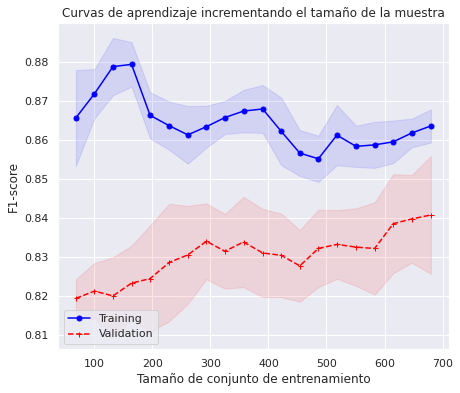

In [ ]:
delta_train_sz = np.linspace(0.1,1, num=20)
pipelineLR = Pipeline(steps=[('ct',TransformColumns),('m',LogisticRegression(max_iter=10000, random_state=1,C = 0.1, class_weight = 0.1, penalty = 'l2', solver = 'newton-cg'))])
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineLR,    
                                              X = Xtv,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'f1',
                                              random_state=2)

print('Curvas de aprendizaje de Logistic Regression')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'F1-score','Curvas de aprendizaje incrementando el tamaño de la muestra')

c.  Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones. 

d.  Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

PenaltyList = list()
PenaltyList = ['l1', 'l2', 'elasticnet', 'none']

DTModel = DecisionTreeClassifier()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GS = GridSearchCV(estimator=DTModel,
            param_grid={'ccp_alpha': [.1,1,10,100],'criterion': ('gini', 'entropy', 'log_loss'), 'max_depth': [1,4,8,12,16,20], 'min_samples_split':[2,4,6], 'class_weight':[0.1,0.2,None]}, cv = kfold, scoring = 'precision')

GS.fit(XtrainTransf,ytv.values.ravel())
print("Best parameter (precision score=%0.3f):" % GS.best_score_)
print(GS.best_params_)

Best parameter (precision score=0.700):
{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


Curvas de aprendizaje de Logistic Regression


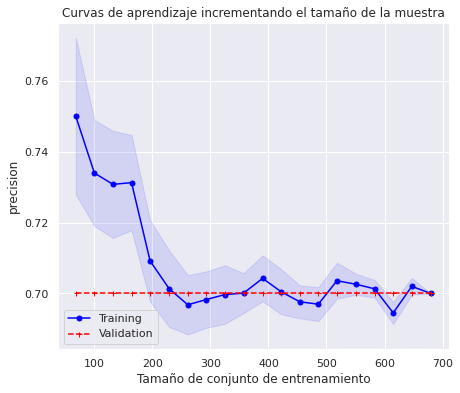

In [ ]:
delta_train_sz = np.linspace(0.1,1, num=20)
pipelineDT = Pipeline(steps=[('ct',TransformColumns),('m',DecisionTreeClassifier(ccp_alpha = 0.1, class_weight = None, criterion = 'gini', max_depth=1, min_samples_split = 2))])
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineDT,    
                                              X = Xtv,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'precision',
                                              random_state=2)

print('Curvas de aprendizaje de Logistic Regression')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'precision','Curvas de aprendizaje incrementando el tamaño de la muestra')



e.  Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica 
“recall”? Incluye tus conclusiones. 
 
NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo  

f.  Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

delta_train_sz = np.linspace(0.1,1, num=20)

RFModel = RandomForestClassifier()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GS = GridSearchCV(estimator=RFModel,
            param_grid={'ccp_alpha': [.1,10,100],'criterion': ('gini', 'entropy'), 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[2,4,6], 'class_weight':[0.1,None], 'min_samples_leaf': [2,4,6]}, cv = kfold, scoring = 'recall')

GS.fit(XtrainTransf,ytv.values.ravel())
print("Best parameter (recall score=%0.3f):" % GS.best_score_)
print(GS.best_params_)

Best parameter (recall score=1.000):
{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


Curvas de aprendizaje de Logistic Regression


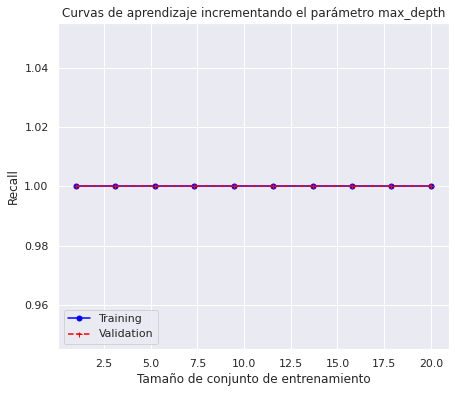

In [ ]:
delta_train_sz = np.linspace(1,20, num=10)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#ccp_alpha = 0.1, class_weight = None,criterion = 'gini',min_samples_split = 2,min_samples_leaf = 2

tr_scores, val_scores = validation_curve(estimator = RandomForestClassifier(ccp_alpha = 0.1, class_weight = None,criterion = 'gini',min_samples_split = 2,min_samples_leaf = 2),    
                                              X = XtrainTransf,
                                              y = ytv.values.ravel(),
                                              cv = kfold ,
                                              param_name = 'max_depth',
                                              param_range = delta_train_sz,
                                              scoring = 'recall')

print('Curvas de aprendizaje de Logistic Regression')
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'Recall', 'Curvas de aprendizaje incrementando el parámetro max_depth')

6.  Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación: 

a.  Obtener el  modelo de regresión logística con los mejores parámetros que hayas 
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye 
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido. 

b.  Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas 
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e 
incluye tus conclusiones finales para este caso.

c.   Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.  
 

In [ ]:
from pprint import pprint as pp
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))
BestLRModel = LogisticRegression(max_iter=10000, random_state=1,C = 0.1, class_weight = 0.1, penalty = 'l2', solver = 'newton-cg')
BestLRModel.fit(XtestTransf,ytest)
ypred = BestLRModel.predict(XtestTransf)
target_names = ['class 0', 'class 1']
r = classification_report(ytest, ypred)
print(r)

              precision    recall  f1-score   support

           0       0.76      0.36      0.48        45
           1       0.78      0.95      0.85       105

    accuracy                           0.77       150
   macro avg       0.77      0.65      0.67       150
weighted avg       0.77      0.77      0.74       150



In [ ]:
from pprint import pprint as pp
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))
BestDTModel = DecisionTreeClassifier(ccp_alpha = 0.1, class_weight = None, criterion = 'gini', max_depth=1, min_samples_split = 2)
BestDTModel.fit(XtestTransf,ytest)
ypred = BestDTModel.predict(XtestTransf)
target_names = ['class 0', 'class 1']
r = classification_report(ytest, ypred)
print(r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150



In [ ]:
from pprint import pprint as pp
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))
BestRFModel = RandomForestClassifier(ccp_alpha = 0.1, class_weight = None,criterion = 'gini',min_samples_split = 2,min_samples_leaf = 2,max_depth =1)
BestRFModel.fit(XtestTransf,ytest)
ypred = BestRFModel.predict(XtestTransf)
target_names = ['class 0', 'class 1']
r = classification_report(ytest, ypred)
print(r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150

